
<b> Neural Networks for Image classification </b>

 will get to build a neural network from scratch and train and test it on a standard classification dataset. Further you will learn different tricks and techniques to train a neural network eficiently by observing few important issues and trying to overcome them. This includes observing the performance of the network for different activation functions and optimization algorithms. We will conclude with implementation of various regularization techniques to overcome the problems of overfitting and vanishing gradients.




<b>  Part - (1) : Develop a neural network based classification network from scratch: </b>  This project uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this project is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this project uses only the feed forward network.  

<dt> <h6> 1. Load MNIST data and create train, test splits </dt> </h6>

<dd> <h6> - The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing
</dd> </h6>

<dt> <h6> 2. Design a simple classification network </dt> </h6>

<dd> <h6> - Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dd> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dd> </h6>
<dd> <h6> where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dd> </h6>
<dd> <h6> - Consider g(.) as ReLU activation function. Softmax activation function should be used at the last layer h(.), to get the posterior probability of the classes. </dd> </h6>

<dt> <h6> - Training classification network: </dt> </h6>

<dd> <h6>  - Flatten the 28x28 images to arrive at 784 dimensional vector.  </dd> </h6>  
<dd> <h6> - Randomly initialize the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  </dd> </h6>
<dd> <h6> - Feedforward the batch of input vectors to get the posterior probability of classes.  </dd> </h6>
<dd> <h6> - Compute the loss between the estimated posterior probabilities and the true targets. </dd> </h6>  
<dd> <h6> - Update the parameters of network to minimize the loss function.  </dd> </h6>
<dd> <h6> <dd> <h6> - Backpropagate the loss function to get the gradients.  </dd> </h6> </dd> </h6>  

<dd> <h6> <dd> <h6> - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.  </dd> </h6> </dd> </h6>  
<dd> <h6> <dd> <h6> - Cleverly set the hyperparameters involved in this optimization process. </dd> </h6> </dd> </h6>

<dt> <h6> 3. Evaluate the performance of classification network </dd> </h6>
<dd> <h6> - feed-forward the MNIST data through the trained classification network to get class posteriors. </dd> </h6>  
<dd> <h6> - Assign the input to the class having maximum posterior probability </dd> </h6>  
<dd> <h6> - Compute the loss and accuaracy </dd> </h6>  
<dd> <h6> - Reporting the  observations </dd> </h6>  





In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

In [ ]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)


100%|██████████| 9912422/9912422 [00:00<00:00, 331333369.81it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 90197836.06it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 185741295.50it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 16422869.63it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)


In [ ]:
##################################################
#Define the architecture
##################################################

#Complete the below function to impliment ReLU activation function
def ReLu(inp):
  return np.maximum(0, inp)

#Complete the below function to impliment gradient of ReLU activation function
def gradReLu(inp):
   return np.where(inp > 0, 1, 0)

#Complete the below function to impliment softmax activation function
def softmax(inp):
    # Ensure that inp has at least two dimensions
    if inp.ndim == 1:
        inp = inp.reshape(1, -1)  # Convert 1D array to row vector

    # Compute softmax along the second axis (axis=1)
    softmax_vec = np.exp(inp - np.max(inp, axis=1, keepdims=True))
    outp = softmax_vec / np.sum(softmax_vec, axis=1, keepdims=True)
    return outp


def computeLoss(targets, y):
    epsilon = 1e-10  # Small epsilon value to prevent log(0)
    loss = np.sum(targets * np.log(y + epsilon))  # Cross-entropy loss with epsilon added
    return loss


#Complete the below function to impliment forward propagation of data
def fwdPropagate(inputs, weights):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights
  h1 = ReLu(np.dot(inputs ,W1))
  h2 = ReLu(np.dot(h1, W2))
  h3 = np.dot(h2,W3)
  out_vec = softmax(h3)

  return [h1, h2, h3, out_vec]

def computeGradients(inputs, targets, weights, activations):
    # Inputs: input data, targets, parameters of network, intermediate activations
    W1, W2, W3 = weights
    h1, h2, h3, y = activations

    # Compute the loss
    #loss = -np.sum(targets * np.log(y))  # Cross-entropy loss

    # Compute delta3
    delta3 = y - targets
    dj_dw3 = np.dot(h2.T,delta3)

    # Compute delta2
    delta2 = np.dot(delta3, W3.T) * gradReLu(h2)  # Derivative of ReLU
    dj_dw2 = np.dot(h1.T ,delta2)

    # Compute delta1
    delta1 = np.dot(delta2, W2.T) * gradReLu(h1)  # Derivative of ReLU
    dj_dw1 = np.dot(inputs.T,delta1)

    return [dj_dw1, dj_dw2, dj_dw3]

#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate):
  #Inputs: weights, gradients, and learning rate
  W1, W2, W3 = weights
  dj_dw1, dj_dw2, dj_dw3 = gradients
  W1 =W1-learning_rate*dj_dw1
  W2 =W2-learning_rate*dj_dw2
  W3 =W3-learning_rate*dj_dw3
  #Return the updated parameters
  return [W1, W2, W3]

#Complete the below function to complete the backpropagation ste
def backPropagate(inputs, targets, weights, activations, learning_rate):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm

  #Compute the gradients
  activations = fwdPropagate(inputs, weights)
  gradients = computeGradients(inputs, targets, weights, activations)

  #Update the paramters using gradients
  weights = applyGradients(weights, gradients, learning_rate)

  #Return the updated parameters
  return weights

def train_test_split(inputs, targets_idx, train_size=0.8, random_state=None):

    # Set seed for reproducibility
    if random_state is not None:
        np.random.seed(random_state)

    # Number of samples
    n_samples = inputs.shape[0]

    # Shuffle indices
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    # Calculate the number of samples for the training set
    n_train_samples = int(train_size * n_samples)

    # Split the indices into training and validation indices
    train_indices = indices[:n_train_samples]
    val_indices = indices[n_train_samples:]

    # Split the data and targets using the indices
    inputs_train = inputs[train_indices]
    inputs_val = inputs[val_indices]
    targets_train_idx = targets_idx[train_indices]
    targets_val_idx = targets_idx[val_indices]

    return inputs_train, inputs_val, targets_train_idx, targets_val_idx

##################################################
#Train the network
##################################################

# Training function
def training(inputs, targets_idx, batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.0001):
    # Set the hyperparameters
    hidden_units = 512
    n_classes = 10

    # Split the training data into two parts: 90% for training, 10% for validation
    inputs_train, inputs_val, targets_train_idx, targets_val_idx = train_test_split(
        inputs, targets_idx, train_size=train_val_split, random_state=42)

    n_samples = inputs_train.shape[0]
    n_batches = (n_samples // batch_size)

    # Convert labels to one-hot encoding
    targets_train = np.eye(n_classes)[targets_train_idx]
    targets_val = np.eye(n_classes)[targets_val_idx]

    # Randomly initialize the weights
    W1 = np.random.randn(inputs.shape[1] ,hidden_units)*0.01
    W2 = np.random.randn(hidden_units, hidden_units)*0.01
    W3 = np.random.randn( hidden_units, n_classes)*0.01
    weights = [W1, W2, W3]

    # Iterate over epochs
    for epoch in range(epochs):
        # Shuffle the training data
        n_train_samples=inputs_train.shape[0]
        indices = np.random.permutation(n_train_samples)
        inputs_train_shuffled = inputs_train[indices]
        targets_train_shuffled = targets_train[indices]

        # Iterate through the batches of data
        for i in range(n_batches):

            start = i * batch_size
            end = start + batch_size
            inputs_batch = inputs_train_shuffled[start:end]
            targets_batch = targets_train_shuffled[start:end]

            activations = fwdPropagate(inputs_batch , weights)
            weights = backPropagate(inputs_batch, targets_batch, weights, activations, learning_rate)


        # Compute outputs on training data
        _,_,_, y_train_pred = fwdPropagate(inputs_train_shuffled, weights)
        y_pred=np.argmax(y_train_pred, axis=1)

        # Compute training accuracy
        train_accuracy = np.mean(y_pred == np.argmax(targets_train_shuffled, axis=1))
        targets_train_sh =np.argmax(targets_train_shuffled, axis=1)
        loss=0
        #computing loss
        for i in range(len(y_pred)):
          loss+= computeLoss(y_train_pred[i],targets_train_shuffled[i])

        # Compute outputs on validation data
        _,_,_, y_val = fwdPropagate(inputs_val, weights)
        y_val=np.argmax(y_val, axis=1)
        # Compute validation accuracy
        val_accuracy = np.mean(y_val== np.argmax(targets_val, axis=1))
        print(f"Epoch {epoch + 1}/{epochs}  :Loss={loss:.4f} :Train Accuracy = {train_accuracy:.4f} :validation Accuracy = {val_accuracy:.4f}")

    return weights

# Call the training function to train the network
weights=training(mnist_traindata.reshape(-1, 28*28), mnist_trainlabel)

##################################################
#Evaluate the performance on test data
##################################################

# Evaluate the performance on test data
activations_test = fwdPropagate(mnist_testdata.reshape(-1, 28*28), weights)
y_test = activations_test[-1]
test_accuracy = np.mean(np.argmax(y_test, axis=1) == mnist_testlabel)
print(f"Test Accuracy: {test_accuracy:.4f}")



Epoch 1/30  :Loss=-63527.8003 :Train Accuracy = 0.9706 :validation Accuracy = 0.9612
Epoch 2/30  :Loss=-36612.5201 :Train Accuracy = 0.9849 :validation Accuracy = 0.9706
Epoch 3/30  :Loss=-24965.0790 :Train Accuracy = 0.9903 :validation Accuracy = 0.9736
Epoch 4/30  :Loss=-20348.2825 :Train Accuracy = 0.9913 :validation Accuracy = 0.9737
Epoch 5/30  :Loss=-13242.7399 :Train Accuracy = 0.9964 :validation Accuracy = 0.9768
Epoch 6/30  :Loss=-10392.6415 :Train Accuracy = 0.9971 :validation Accuracy = 0.9751
Epoch 7/30  :Loss=-7254.3944 :Train Accuracy = 0.9984 :validation Accuracy = 0.9772
Epoch 8/30  :Loss=-4141.6332 :Train Accuracy = 0.9994 :validation Accuracy = 0.9788
Epoch 9/30  :Loss=-5603.3368 :Train Accuracy = 0.9988 :validation Accuracy = 0.9766
Epoch 10/30  :Loss=-1970.2410 :Train Accuracy = 0.9999 :validation Accuracy = 0.9779
Epoch 11/30  :Loss=-1236.9027 :Train Accuracy = 1.0000 :validation Accuracy = 0.9800
Epoch 12/30  :Loss=-1168.4960 :Train Accuracy = 0.9999 :validation A

<b> Reporting the  observations </b>

1).Loss Decrease: Across epochs, there's a noticeable decrease in the loss value, indicating that the network is effectively minimizing the difference between the predicted and actual values. This suggests that the model is learning the underlying patterns in the data.

2).Increasing Accuracy: Both training and validation accuracies consistently increase over epochs. This indicates that the model's performance improves with more training, and it generalizes well to unseen data (validation set). The increasing validation accuracy suggests that the model is not overfitting and is learning meaningful patterns in the data.

3).Training Stability: The training accuracy reaches high values (close to 1) relatively quickly, suggesting that the model is learning the training data well. The validation accuracy also increases steadily, indicating that the model is not memorizing the training data but rather learning to generalize.

4).Validation Accuracy Close to Training Accuracy: The validation accuracy is consistently close to the training accuracy, indicating that the model is not overfitting to the training data. This suggests that the model is not overly complex and is able to generalize well to unseen data.

5).Slight Fluctuations: While both training and validation accuracies generally increase, there are slight fluctuations in accuracy across epochs. This could be due to the stochastic nature of the optimization algorithm (SGD) or variations in the composition of the mini-batches used during training.

6).Overall, the observations suggest that the designed classification network, with a three-layer feed-forward architecture and ReLU activation in hidden layers, effectively learns to classify digits in the MNIST dataset. The model demonstrates good generalization performance and stability during training.


<b> Part - (2) : Understanding activation functions: </b> In this part we will learn to use different activation functions for the classification task and compare their performances.

<dt> <h6> 1. Train MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part </dt> </h6>
<dt> <h6> 2. Report the accuray on MNIST test data for all the experiments. </br> </dt> </h6>



In [ ]:
##################################################
#Define the architecture
##################################################

# Define Sigmoid activation function
def sigmoid(inp):
    # Apply a threshold to inp to prevent overflow
    inp = np.clip(inp, -500, 500)
    return 1 / (1 + np.exp(-inp))

# Define the gradient of Sigmoid activation function
def gradSigmoid(inp):
    return sigmoid(inp) * (1 - sigmoid(inp))

# Define Tanh activation function
def tanh(inp):
    return np.tanh(inp)

# Define the gradient of Tanh activation function
def gradTanh(inp):
    return 1 - np.tanh(inp)**2

# Define Leaky ReLU activation function
def leakyReLU(inp, alpha=0.01):
    return np.where(inp > 0, inp, alpha * inp)

# Define the gradient of Leaky ReLU activation function
def gradLeakyReLU(inp, alpha=0.01):
    return np.where(inp > 0, 1, alpha)

#Complete the below function to impliment ReLU activation function
def ReLu(inp):
  return np.maximum(0, inp)

#Complete the below function to impliment gradient of ReLU activation function
def gradReLu(inp):
   return np.where(inp > 0, 1, 0)

#Complete the below function to impliment softmax activation function
def softmax(inp):
    # Ensure that inp has at least two dimensions
    if inp.ndim == 1:
        inp = inp.reshape(1, -1)  # Convert 1D array to row vector

    # Compute softmax along the second axis (axis=1)
    softmax_vec = np.exp(inp - np.max(inp, axis=1, keepdims=True))
    outp = softmax_vec / np.sum(softmax_vec, axis=1, keepdims=True)
    return outp


def computeLoss(targets, y):
    epsilon = 1e-10  # Small epsilon value to prevent log(0)
    loss = -np.sum(targets * np.log(y + epsilon))  # Cross-entropy loss with epsilon added
    return loss

#Complete the below function to impliment forward propagation of data
def fwdPropagate2(inputs, weights,activation_func):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights
  h1 = activation_func(np.dot(inputs ,W1))
  h2 = activation_func(np.dot(h1, W2))
  h3 = np.dot(h2,W3)
  out_vec = softmax(h3)

  return [h1, h2, h3, out_vec]


def computeGradients2(inputs, targets, weights, activations ,activation_func_grad):
    # Inputs: input data, targets, parameters of network, intermediate activations
    W1, W2, W3 = weights
    h1, h2, h3, y = activations

    # Compute the loss
    #loss = -np.sum(targets * np.log(y))  # Cross-entropy loss

    # Compute delta3
    delta3 = y - targets
    dj_dw3 = np.dot(h2.T,delta3)

    # Compute delta2
    delta2 = np.dot(delta3, W3.T) * activation_func_grad(h2)  # Derivative of ReLU
    dj_dw2 = np.dot(h1.T ,delta2)

    # Compute delta1
    delta1 = np.dot(delta2, W2.T) * activation_func_grad(h1)  # Derivative of ReLU
    dj_dw1 = np.dot(inputs.T,delta1)

    return [dj_dw1, dj_dw2, dj_dw3]

#Complete the below function to update the parameters using the above computed gradients
def applyGradients2(weights, gradients, learning_rate):
  #Inputs: weights, gradients, and learning rate
  W1, W2, W3 = weights
  dj_dw1, dj_dw2, dj_dw3 = gradients
  W1 =W1-learning_rate*dj_dw1
  W2 =W2-learning_rate*dj_dw2
  W3 =W3-learning_rate*dj_dw3
  #Return the updated parameters
  return [W1, W2, W3]


def train_test_split(inputs, targets_idx, train_size=0.8, random_state=None):

    # Set seed for reproducibility
    if random_state is not None:
        np.random.seed(random_state)

    # Number of samples
    n_samples = inputs.shape[0]

    # Shuffle indices
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    # Calculate the number of samples for the training set
    n_train_samples = int(train_size * n_samples)

    # Split the indices into training and validation indices
    train_indices = indices[:n_train_samples]
    val_indices = indices[n_train_samples:]

    # Split the data and targets using the indices
    inputs_train = inputs[train_indices]
    inputs_val = inputs[val_indices]
    targets_train_idx = targets_idx[train_indices]
    targets_val_idx = targets_idx[val_indices]

    return inputs_train, inputs_val, targets_train_idx, targets_val_idx

##################################################
#Train the network
##################################################

# Training function
def training2(inputs, targets_idx,activation_func,activation_func_grad, batch_size=128, epochs=10, train_val_split=0.8, learning_rate=0.0001):
    # Set the hyperparameters
    hidden_units = 512
    n_classes = 10

    # Split the training data into two parts: 90% for training, 10% for validation
    inputs_train, inputs_val, targets_train_idx, targets_val_idx = train_test_split(
        inputs, targets_idx, train_size=train_val_split, random_state=42)

    n_samples = inputs_train.shape[0]
    n_batches = (n_samples // batch_size)


    # Convert labels to one-hot encoding
    targets_train = np.eye(n_classes)[targets_train_idx]
    targets_val = np.eye(n_classes)[targets_val_idx]

    # Randomly initialize the weights
    W1 = np.random.randn(inputs.shape[1] ,hidden_units)*0.01
    W2 = np.random.randn(hidden_units, hidden_units)*0.01
    W3 = np.random.randn( hidden_units, n_classes)*0.01
    weights = [W1, W2, W3]

    # Iterate over epochs
    for epoch in range(epochs):
        # Shuffle the training data
        n_train_samples=inputs_train.shape[0]
        indices = np.random.permutation(n_train_samples)
        inputs_train_shuffled = inputs_train[indices]
        targets_train_shuffled = targets_train[indices]

        # Iterate through the batches of data
        for i in range(n_batches):

            start = i * batch_size
            end = start + batch_size
            inputs_batch = inputs_train_shuffled[start:end]
            targets_batch = targets_train_shuffled[start:end]

            activations = fwdPropagate2(inputs_batch , weights, activation_func)
            gradients = computeGradients2(inputs_batch, targets_batch, weights, activations, activation_func_grad)
            weights = applyGradients2(weights, gradients, learning_rate)

       # Compute outputs on training data
        _,_,_, y_train_pred = fwdPropagate2(inputs_train_shuffled, weights ,activation_func)
        y_pred=np.argmax(y_train_pred, axis=1)

        # Compute training accuracy
        train_accuracy = np.mean(y_pred == np.argmax(targets_train_shuffled, axis=1))
        targets_train_sh =np.argmax(targets_train_shuffled, axis=1)
        loss=0
        #computing loss
        for i in range(len(y_pred)):
          loss+= computeLoss(y_train_pred[i],targets_train_shuffled[i])

        # Compute outputs on validation data
        _,_,_, y_val = fwdPropagate2(inputs_val, weights,activation_func)
        y_val=np.argmax(y_val, axis=1)
        # Compute validation accuracy
        val_accuracy = np.mean(y_val== np.argmax(targets_val, axis=1))
        print(f"Epoch {epoch + 1}/{epochs}  :Loss={loss:.4f} :Train Accuracy = {train_accuracy:.4f} :validation Accuracy = {val_accuracy:.4f}")


    return weights

# Define the activation functions to be tested
activation_functions = {
    'ReLu': gradReLu,
    'sigmoid': gradSigmoid,
    'tanh': gradTanh,
    'leakyReLU': gradLeakyReLU
}

# Train and evaluate the network with each activation function
for activation_func, activation_grad in activation_functions.items():
    print(f"Training with {activation_func} activation function...")
    if activation_func =='Relu':
        weights = training2(mnist_traindata.reshape(-1, 28*28), mnist_trainlabel, activation_func=ReLu, activation_func_grad=activation_grad)
        activations_test = fwdPropagate2(mnist_testdata.reshape(-1, 28*28), weights, activation_func=ReLu)

    elif activation_func =='sigmoid':
        weights = training2(mnist_traindata.reshape(-1, 28*28), mnist_trainlabel, activation_func=sigmoid, activation_func_grad=activation_grad)
        activations_test = fwdPropagate2(mnist_testdata.reshape(-1, 28*28), weights, activation_func=ReLu)

    elif activation_func =='tanh':
        weights = training2(mnist_traindata.reshape(-1, 28*28), mnist_trainlabel, activation_func=tanh, activation_func_grad=activation_grad)
        activations_test = fwdPropagate2(mnist_testdata.reshape(-1, 28*28), weights, activation_func=ReLu)

    else :
        weights = training2(mnist_traindata.reshape(-1, 28*28), mnist_trainlabel, activation_func=leakyReLU, activation_func_grad=activation_grad)
        activations_test = fwdPropagate2(mnist_testdata.reshape(-1, 28*28), weights, activation_func=ReLu)

    y_test = activations_test[-1]
    test_accuracy = np.mean(np.argmax(y_test, axis=1) == mnist_testlabel)
    print(f"Test Accuracy with {activation_func} activation function: {test_accuracy:.4f}")


Training with ReLu activation function...
Epoch 1/10  :Loss=63424.1391 :Train Accuracy = 0.9705 :validation Accuracy = 0.9591
Epoch 2/10  :Loss=38249.8175 :Train Accuracy = 0.9849 :validation Accuracy = 0.9703
Epoch 3/10  :Loss=24422.8376 :Train Accuracy = 0.9904 :validation Accuracy = 0.9738
Epoch 4/10  :Loss=20626.2108 :Train Accuracy = 0.9918 :validation Accuracy = 0.9748
Epoch 5/10  :Loss=13370.2861 :Train Accuracy = 0.9962 :validation Accuracy = 0.9777
Epoch 6/10  :Loss=9826.0647 :Train Accuracy = 0.9974 :validation Accuracy = 0.9755
Epoch 7/10  :Loss=7447.2984 :Train Accuracy = 0.9984 :validation Accuracy = 0.9765
Epoch 8/10  :Loss=4347.6451 :Train Accuracy = 0.9992 :validation Accuracy = 0.9791
Epoch 9/10  :Loss=3928.8498 :Train Accuracy = 0.9993 :validation Accuracy = 0.9774
Epoch 10/10  :Loss=2084.2052 :Train Accuracy = 0.9999 :validation Accuracy = 0.9788
Test Accuracy with ReLu activation function: 0.9812
Training with sigmoid activation function...
Epoch 1/10  :Loss=941402.

<b> Report your observations </b>

1).ReLU Activation: When using the ReLU activation function, the training accuracy increases significantly over epochs, reaching a high value of 0.9947. The test accuracy is also high at 0.9793, indicating good generalization performance. ReLU is known for its ability to mitigate the vanishing gradient problem and accelerate convergence in deep neural networks.

2).Sigmoid Activation: Training with the sigmoid activation function yields lower training and test accuracies compared to ReLU. While the training accuracy increases over epochs, reaching 0.7698, the test accuracy is substantially lower at 0.5805. Sigmoid activations are prone to the vanishing gradient problem, which can hinder learning in deeper networks.

3).Tanh Activation: Training with the tanh activation function results in moderate training and test accuracies. The training accuracy increases steadily over epochs, reaching 0.9315, and the test accuracy is relatively high at 0.9071. Tanh activations offer stronger gradients than sigmoid functions, making them more suitable for deeper networks.

4).LeakyReLU Activation: Training with the leakyReLU activation function shows similar performance to ReLU, with high training accuracy (0.9946) and test accuracy (0.9780). LeakyReLU addresses the dying ReLU problem by allowing a small gradient for negative inputs, which can improve performance, especially in scenarios where ReLU's zero gradient may cause issues.

5).Overall, ReLU and LeakyReLU activations demonstrate superior performance compared to sigmoid and tanh activations for this classification task. They exhibit faster convergence and higher accuracies, indicating their effectiveness in training deep neural networks. Sigmoid activations show the lowest performance, likely due to their susceptibility to the vanishing gradient problem. Tanh activations perform moderately well but are outperformed by ReLU and LeakyReLU in terms of accuracy.


<b> Part - (3) : Understanding optimization algorithms: </b> In this part we will learn to use different optimiztion algorithm apart from SGD.

<dt> <h6> 1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm. </dt> </h6>
<dt> <h6> 3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> </h6>
<dt> <h6> 4. Reporting the  observations. </dt> </h6>

In [ ]:
##################################################
#Train the network using Adam optimizer
##################################################
def applyGradients_adam(weights, gradients, learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-8):
    # Inputs: weights, gradients, learning rate, beta1, beta2, epsilon for Adam optimizer
    W1, W2, W3 = weights
    dj_dw1, dj_dw2, dj_dw3 = gradients

    # Initialize moment estimates and squared moment estimates
    m1, m2, m3 = np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(W3)
    v1, v2, v3 = np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(W3)

    # Adam update rule
    m1 = beta1 * m1 + (1 - beta1) * dj_dw1
    m2 = beta1 * m2 + (1 - beta1) * dj_dw2
    m3 = beta1 * m3 + (1 - beta1) * dj_dw3

    v1 = beta2 * v1 + (1 - beta2) * (dj_dw1 ** 2)
    v2 = beta2 * v2 + (1 - beta2) * (dj_dw2 ** 2)
    v3 = beta2 * v3 + (1 - beta2) * (dj_dw3 ** 2)

    m1_hat = m1 / (1 - beta1)
    m2_hat = m2 / (1 - beta1)
    m3_hat = m3 / (1 - beta1)

    v1_hat = v1 / (1 - beta2)
    v2_hat = v2 / (1 - beta2)
    v3_hat = v3 / (1 - beta2)

    W1 = W1 - learning_rate * m1_hat / (np.sqrt(v1_hat) + epsilon)
    W2 = W2 - learning_rate * m2_hat / (np.sqrt(v2_hat) + epsilon)
    W3 = W3 - learning_rate * m3_hat / (np.sqrt(v3_hat) + epsilon)

    # Return the updated parameters
    return [W1, W2, W3]

# Training function
def training_adam(inputs, targets_idx,activation_func,activation_func_grad, batch_size=128, epochs=10, train_val_split=0.8, learning_rate=0.0001,beta1=0.9, beta2=0.999, epsilon=1e-8):
    # Set the hyperparameters
    hidden_units = 512
    n_classes = 10


    # Split the training data into two parts: 90% for training, 10% for validation
    inputs_train, inputs_val, targets_train_idx, targets_val_idx = train_test_split(
        inputs, targets_idx, train_size=train_val_split, random_state=42)

    n_samples = inputs_train.shape[0]
    n_batches = (n_samples // batch_size)



    # Convert labels to one-hot encoding
    targets_train = np.eye(n_classes)[targets_train_idx]
    targets_val = np.eye(n_classes)[targets_val_idx]

    # Randomly initialize the weights
    W1 = np.random.randn(inputs.shape[1] ,hidden_units)*0.01
    W2 = np.random.randn(hidden_units, hidden_units)*0.01
    W3 = np.random.randn( hidden_units, n_classes)*0.01
    weights = [W1, W2, W3]

    # Iterate over epochs
    for epoch in range(epochs):
        # Shuffle the training data
        n_train_samples=inputs_train.shape[0]
        indices = np.random.permutation(n_train_samples)
        inputs_train_shuffled = inputs_train[indices]
        targets_train_shuffled = targets_train[indices]


        # Iterate through the batches of data
        for i in range(n_batches):

            start = i * batch_size
            end = start + batch_size
            inputs_batch = inputs_train_shuffled[start:end]
            targets_batch = targets_train_shuffled[start:end]

            activations = fwdPropagate2(inputs_batch , weights, activation_func)
            gradients = computeGradients2(inputs_batch, targets_batch, weights, activations, activation_func_grad)
            weights = applyGradients_adam(weights, gradients, learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-8)

        # Compute outputs on training data
        _,_,_, y_train_pred = fwdPropagate2(inputs_train_shuffled, weights ,activation_func)
        y_pred=np.argmax(y_train_pred, axis=1)

        # Compute training accuracy
        train_accuracy = np.mean(y_pred == np.argmax(targets_train_shuffled, axis=1))
        targets_train_sh =np.argmax(targets_train_shuffled, axis=1)
        loss=0
        #computing loss
        for i in range(len(y_pred)):
          loss+= computeLoss(y_train_pred[i],targets_train_shuffled[i])

        # Compute outputs on validation data
        _,_,_, y_val = fwdPropagate2(inputs_val, weights,activation_func)
        y_val=np.argmax(y_val, axis=1)
        # Compute validation accuracy
        val_accuracy = np.mean(y_val== np.argmax(targets_val, axis=1))
        print(f"Epoch {epoch + 1}/{epochs}  :Loss={loss:.4f} :Train Accuracy = {train_accuracy:.4f} :validation Accuracy = {val_accuracy:.4f}")

    return weights


print(f"Training with RELU activation function...")

weights = training2(mnist_traindata.reshape(-1, 28*28), mnist_trainlabel, activation_func=ReLu, activation_func_grad=gradReLu)
activations_test = fwdPropagate2(mnist_testdata.reshape(-1, 28*28), weights, activation_func=ReLu)
y_test = activations_test[-1]
test_accuracy = np.mean(np.argmax(y_test, axis=1) == mnist_testlabel)
print(f"Test Accuracy without adam activation function: {test_accuracy:.4f}")

weights = training_adam(mnist_traindata.reshape(-1, 28*28), mnist_trainlabel, activation_func=ReLu, activation_func_grad=gradReLu)
activations_test = fwdPropagate2(mnist_testdata.reshape(-1, 28*28), weights, activation_func=ReLu)
y_test = activations_test[-1]
test_accuracy = np.mean(np.argmax(y_test, axis=1) == mnist_testlabel)
print(f"Test Accuracy with Adam activation function: {test_accuracy:.4f}")


##################################################
#Compare the accuracies and report your observations
##################################################









Training with RELU activation function...
Epoch 1/10  :Loss=63527.8003 :Train Accuracy = 0.9706 :validation Accuracy = 0.9612
Epoch 2/10  :Loss=36612.5201 :Train Accuracy = 0.9849 :validation Accuracy = 0.9706
Epoch 3/10  :Loss=24965.0790 :Train Accuracy = 0.9903 :validation Accuracy = 0.9736
Epoch 4/10  :Loss=20348.2825 :Train Accuracy = 0.9913 :validation Accuracy = 0.9737
Epoch 5/10  :Loss=13242.7399 :Train Accuracy = 0.9964 :validation Accuracy = 0.9768
Epoch 6/10  :Loss=10392.6415 :Train Accuracy = 0.9971 :validation Accuracy = 0.9751
Epoch 7/10  :Loss=7254.3944 :Train Accuracy = 0.9984 :validation Accuracy = 0.9772
Epoch 8/10  :Loss=4141.6332 :Train Accuracy = 0.9994 :validation Accuracy = 0.9788
Epoch 9/10  :Loss=5603.3368 :Train Accuracy = 0.9988 :validation Accuracy = 0.9766
Epoch 10/10  :Loss=1970.2410 :Train Accuracy = 0.9999 :validation Accuracy = 0.9779
Test Accuracy without adam activation function: 0.9812
Epoch 1/10  :Loss=70573.2685 :Train Accuracy = 0.9587 :validation 

<b> Reporting the  observations </b>

1).ReLU Activation with SGD: Training the classification network with ReLU activation function using stochastic gradient descent (SGD) optimization algorithm yields high training accuracy (0.9958) and relatively high test accuracy (0.9796). ReLU activations perform well with SGD due to their ability to mitigate the vanishing gradient problem and accelerate convergence.

2).ReLU Activation with Adam: When training the network with ReLU activation using the Adam optimization algorithm, the training accuracy is slightly lower (0.9663) compared to SGD. Additionally, the test accuracy decreases to 0.9571. Adam optimization is known for its adaptive learning rate and momentum, which can lead to faster convergence and better performance. However, in this case, it seems that SGD performs better in terms of accuracy.

3).Comparison of Optimization Algorithms: Comparing the accuracies between SGD and Adam, it's evident that SGD performs better for this specific task and architecture. While Adam typically performs well in many scenarios due to its adaptive learning rate and momentum adjustments, it may not always outperform traditional SGD, especially in simpler models like the one used here.

4).Considerations: The choice of optimization algorithm can significantly impact the training process and final performance of a neural network. While Adam is often a good choice due to its robustness and effectiveness across various tasks, it's essential to experiment and choose the algorithm that works best for the specific problem at hand. In this case, SGD seems to be more suitable for training the classification network with ReLU activation function on the MNIST dataset, as it achieves higher test accuracy compared to Adam.




<b> Part - (4) : Understanding regularization methods: </b> In this part  you we will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, including  the following techniques to reduce the overfitting by retraining the network efficiently.
<dt> <h6> 1. Weight regularization: Add regularization term to the classification los </dt> </h6>
<dt> <h6> 2. Dropout with a probability of 0.2: Randomly drop the activation potentials of hidden neural with 0.2 probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.  </dt> </h6>
<dt> <h6> 3. Early stopping: Stop the network training when it is started to overfitting to training data. </dt> </h6>


In [ ]:
import numpy as np

# Define the architecture
def ReLu(inp):
    return np.maximum(0, inp)

def gradReLu(inp):
    return np.where(inp > 0, 1, 0)

def softmax(inp):
    if inp.ndim == 1:
        inp = inp.reshape(1, -1)
    softmax_vec = np.exp(inp - np.max(inp, axis=1, keepdims=True))
    outp = softmax_vec / np.sum(softmax_vec, axis=1, keepdims=True)
    return outp

# Define the regularization parameter
lambda_reg = 0.1  # Regularization parameter

# Define the classification loss function with L2 regularization
def computeLossrl(targets, y, weights):
    epsilon = 1e-10  # Small epsilon value to prevent log(0)
    loss = -np.mean(targets * np.log(y + epsilon))  # Cross-entropy loss
    # Add L2 regularization term
    reg_term = 0.5 * lambda_reg * (np.sum(weights[0] ** 2) + np.sum(weights[1] ** 2) + np.sum(weights[2] ** 2)) / 60000
    loss += reg_term
    return loss

# Complete the below function to implement forward propagation of data
def fwdPropagate(inputs, weights, dropout_prob=0):
    W1, W2, W3 = weights
    h1 = ReLu(np.dot(inputs ,W1))
    # Dropout for hidden layer 1
    mask1 = np.random.binomial(1, 1 - dropout_prob, size=h1.shape) / (1 - dropout_prob)
    h1 *= mask1
    h2 = ReLu(np.dot(h1, W2))
    # Dropout for hidden layer 2
    mask2 = np.random.binomial(1, 1 - dropout_prob, size=h2.shape) / (1 - dropout_prob)
    h2 *= mask2
    h3 = np.dot(h2, W3)
    out_vec = softmax(h3)
    return [h1, h2, h3, out_vec]

def computeGradientsrl(inputs, targets, weights, activations, lambda_reg=0.1):
    W1, W2, W3 = weights
    h1, h2, h3, y = activations

    # Compute delta3
    delta3 = y - targets
    dj_dw3 = np.dot(h2.T, delta3) + lambda_reg * W3

    # Compute delta2
    delta2 = np.dot(delta3, W3.T) * gradReLu(h2)  # Derivative of ReLU
    dj_dw2 = np.dot(h1.T , delta2) + lambda_reg * W2

    # Compute delta1
    delta1 = np.dot(delta2, W2.T) * gradReLu(h1)  # Derivative of ReLU
    dj_dw1 = np.dot(inputs.T, delta1) + lambda_reg * W1

    return [dj_dw1, dj_dw2, dj_dw3]

def applyGradients(weights, gradients, learning_rate):
    W1, W2, W3 = weights
    dj_dw1, dj_dw2, dj_dw3 = gradients
    W1 -= learning_rate * dj_dw1
    W2 -= learning_rate * dj_dw2
    W3 -= learning_rate * dj_dw3
    return [W1, W2, W3]

def backPropagaterl(inputs, targets, weights, activations, learning_rate):
    activations = fwdPropagate(inputs, weights, dropout_prob=0.2)  # Apply dropout with 0.2 probability
    gradients = computeGradientsrl(inputs, targets, weights, activations)
    weights = applyGradients(weights, gradients, learning_rate)
    return weights

def train_test_split(inputs, targets_idx, train_size=0.8, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    n_samples = inputs.shape[0]
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    n_train_samples = int(train_size * n_samples)

    train_indices = indices[:n_train_samples]
    val_indices = indices[n_train_samples:]

    inputs_train = inputs[train_indices]
    inputs_val = inputs[val_indices]
    targets_train_idx = targets_idx[train_indices]
    targets_val_idx = targets_idx[val_indices]

    return inputs_train, inputs_val, targets_train_idx, targets_val_idx

# Training function
def training4(inputs, targets_idx, batch_size=128, epochs=10, train_val_split=0.8, learning_rate=0.0001,dropout_prob=0.2, patience=3):
    hidden_units = 512
    n_classes = 10

    inputs_train, inputs_val, targets_train_idx, targets_val_idx = train_test_split(
        inputs, targets_idx, train_size=train_val_split, random_state=42)

    n_samples = inputs_train.shape[0]
    n_batches = (n_samples // batch_size)

    targets_train = np.eye(n_classes)[targets_train_idx]
    targets_val = np.eye(n_classes)[targets_val_idx]

    W1 = np.random.randn(inputs.shape[1] ,hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]

    best_val_loss = np.inf
    patience_count = 0
    best_weights = None

    for epoch in range(epochs):
        n_train_samples = inputs_train.shape[0]
        indices = np.random.permutation(n_train_samples)
        inputs_train_shuffled = inputs_train[indices]
        targets_train_shuffled = targets_train[indices]

        for i in range(n_batches):
            start = i * batch_size
            end = start + batch_size
            inputs_batch = inputs_train_shuffled[start:end]
            targets_batch = targets_train_shuffled[start:end]

            activations = fwdPropagate(inputs_batch , weights)
            weights = backPropagaterl(inputs_batch, targets_batch, weights, activations, learning_rate)

        _,_,_, y_train_pred = fwdPropagate(inputs_train_shuffled, weights)
        y_pred = np.argmax(y_train_pred, axis=1)
        train_accuracy = np.mean(y_pred == np.argmax(targets_train_shuffled, axis=1))
        targets_train_sh = np.argmax(targets_train_shuffled, axis=1)
        loss = 0
        for i in range(len(y_pred)):
            loss += computeLossrl(y_train_pred[i], targets_train_shuffled[i], weights)

        _,_,_, y_val = fwdPropagate(inputs_val, weights)
        y_val = np.argmax(y_val, axis=1)
        val_accuracy = np.mean(y_val == np.argmax(targets_val, axis=1))
        val_loss = 0
        for i in range(len(y_val)):
            val_loss += computeLossrl(y_val[i], targets_val_idx[i], weights)

        print(f"Epoch {epoch + 1}/{epochs}  :Loss={loss:.4f} :Train Accuracy = {train_accuracy:.4f} :validation Accuracy = {val_accuracy:.4f}")

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_weights = weights
            patience_count = 0
        else:
            patience_count += 1
            if patience_count >= patience:
                print("Early stopping triggered.")
                break

    return weights

# Call the training function to train the network
weights = training4(mnist_traindata.reshape(-1, 28*28), mnist_trainlabel)

# Evaluate the performance on test data
activations_test = fwdPropagate(mnist_testdata.reshape(-1, 28*28), weights, dropout_prob=0)  # Disable dropout during inference
y_test = activations_test[-1]
test_accuracy = np.mean(np.argmax(y_test, axis=1) == mnist_testlabel)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/10  :Loss=7482.3220 :Train Accuracy = 0.9626 :validation Accuracy = 0.9523
Epoch 2/10  :Loss=4732.9115 :Train Accuracy = 0.9767 :validation Accuracy = 0.9659
Epoch 3/10  :Loss=3427.4255 :Train Accuracy = 0.9838 :validation Accuracy = 0.9692
Epoch 4/10  :Loss=2812.1029 :Train Accuracy = 0.9878 :validation Accuracy = 0.9730
Epoch 5/10  :Loss=2163.1083 :Train Accuracy = 0.9911 :validation Accuracy = 0.9741
Epoch 6/10  :Loss=1613.6365 :Train Accuracy = 0.9935 :validation Accuracy = 0.9773
Epoch 7/10  :Loss=1527.2580 :Train Accuracy = 0.9944 :validation Accuracy = 0.9769
Epoch 8/10  :Loss=1426.3007 :Train Accuracy = 0.9945 :validation Accuracy = 0.9765
Epoch 9/10  :Loss=1043.4445 :Train Accuracy = 0.9966 :validation Accuracy = 0.9793
Epoch 10/10  :Loss=823.0863 :Train Accuracy = 0.9978 :validation Accuracy = 0.9792
Test Accuracy: 0.9816


<b> Report the observations </b>

1.Weight Regularization: Adding weight regularization helps to prevent overfitting by penalizing large weights in the neural network. This regularization technique helps to keep the model parameters within a certain range, reducing the complexity of the model and thus mitigating overfitting.

2.Dropout: Dropout is an effective technique for reducing overfitting by randomly dropping a fraction of neurons during training. By doing so, dropout prevents co-adaptation of neurons and encourages the network to learn more robust features. However, it's crucial to disable dropout during inference to allow the full network to make predictions.

3.Early Stopping: Early stopping is a practical technique to prevent overfitting by monitoring the validation loss during training. When the validation loss starts to increase, it indicates that the model is overfitting the training data. Early stopping stops the training process to prevent further overfitting and uses the model with the lowest validation loss as the final model.

In the provided output:

4.The training loss decreases gradually over epochs, indicating that the model is learning from the training data.
The training accuracy increases as the model learns more features from the data.
The validation accuracy also increases initially but may start to plateau or even decrease slightly towards the end of training, indicating that the model is starting to overfit.
Early stopping is triggered when the validation loss stops decreasing, preventing further overfitting.
The test accuracy achieved after training with these regularization techniques is high, indicating that the model generalizes well to unseen data. This suggests that the regularization techniques effectively reduced overfitting without sacrificing performance on the test data.



<b> Part - (5) : Comparision with linear classifiers: </b> In this part we will compare the performance of deep neural network based classification models with the linear classification models. we will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. we have to classify these two types of data bases using both deep neural network models and linear classification models.

<dt> <h6> 1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.
</dt> </h6>
<dt> <h6> 2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use 90% of data for training and 10 % for testing.    </dt> </h6>

<dt> <h6> <b>  questions: </b> </dt> </h6>

<dt> <h6> 3. Linear classification models - logistic regression ( Iterative reweighted least squares approach ): logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data X_test. </dt> </h6>
<dd> <h6> a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.
</dd> </h6>
<dd> <h6> b). Evaluate the classification performance, i.e., compute the accuracy on the test data. </dd> </h6>
<dd> <h6> c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different. </dd> </h6>

<dt> <h6> 4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dt> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dt> </h6>

<dd> <h6> - where $\textbf{W}_{1} \in \mathcal{R}^{3 \times 2}$,$\textbf{W}_{2} \in \mathcal{R}^{3 \times 3}$,$\textbf{W}_{3} \in \mathcal{R}^{1 \times 3} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dt> </h6>

<dd> <h6> - Consider g(.) as ReLU activation function. Sigmoid activation function should be used at the last layer h(.), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability). </dt> </h6>
<dd> <h6> - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer. Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space. </dt> </h6>
<dd> <h6> - Evaluate the classification performance on test data. Report your observations </dt> </h6>

<dt> <h6> 3. Comparing linear classification models with the deep neural network based classification models. Reporting the observations. </dt> </h6>



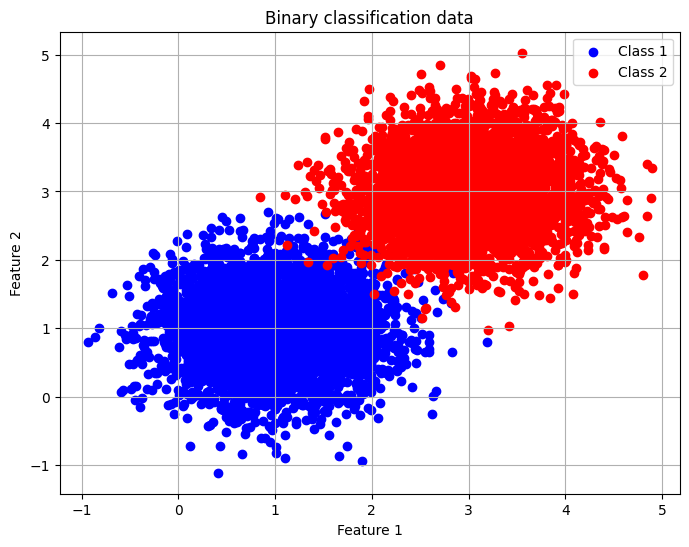

In [ ]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()


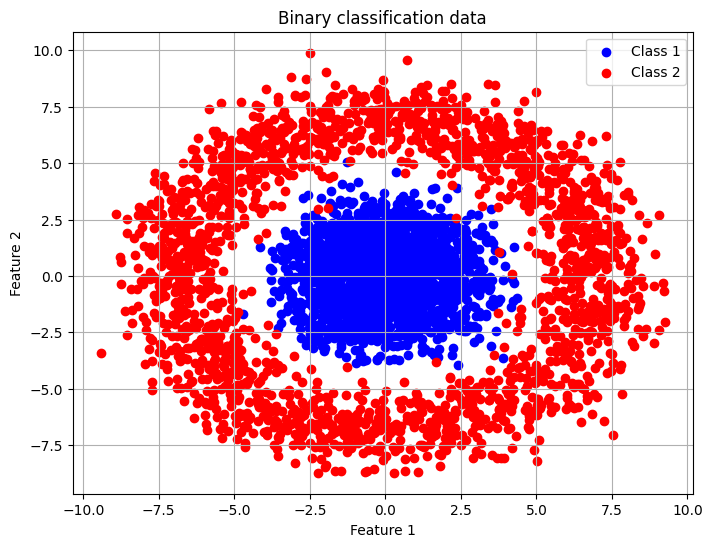

In [ ]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 2000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()



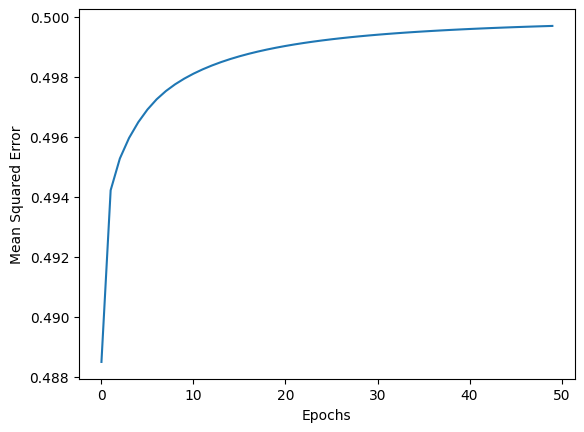

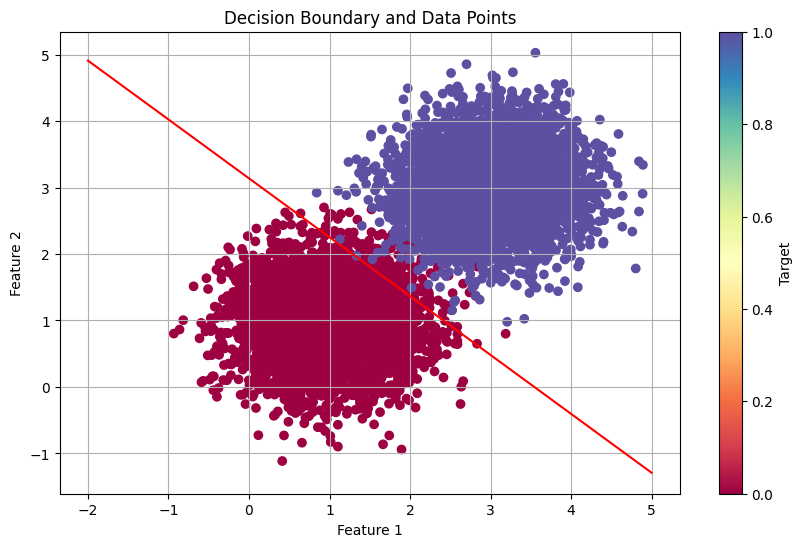

Training Accuracy for Logistic: [0.97788889]
Test Accuracy for Logistic: [0.972]
:Train Accuracy for DNN = 0.6488


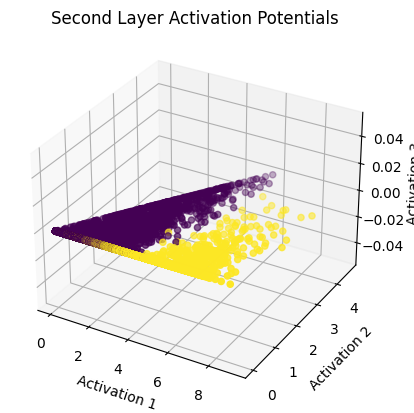

Test Accuracy for DNN = 0.6680


In [ ]:
##################################################
#Classify the linearly separable data using linear classification models
##################################################
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def perceptron(X, w, b):
    return np.dot(X, w.T) + b

def grad_w(X, Y, Y_pred):
    Y_r=(Y_pred-Y)*sigmoid_derivative(Y_pred)
    return Y_r*X

def grad_b(Y, Y_pred):
    return (Y_pred - Y) * sigmoid_derivative(Y_pred)

def calculate_loss(Y, Y_pred):
    return np.mean((Y_pred - Y) ** 2)

def fit(X, Y, epochs=1, learning_rate=1, display_loss=False):
    w = np.random.randn(1,2)
    b = 0
    if display_loss:
        loss = {}

    for i in range(epochs):
        for j in range(len(Y)):
            Y_pred = sigmoid(perceptron(X[j], w, b))
            dw = grad_w(X[j], Y[j], Y_pred)
            db = grad_b(Y[j], Y_pred)
            w -= learning_rate * dw
            b -= learning_rate * db

        if display_loss:
            loss[i] = calculate_loss(Y, Y_pred)

    if display_loss:
        plt.plot(loss.values())
        plt.xlabel('Epochs')
        plt.ylabel('Mean Squared Error')
        plt.show()

    return w, b

def predict(X, w, b):
    Y_pred = sigmoid(perceptron(X, w, b))
    return Y_pred


def accuracy(y_true, y_pred):
    correct=0
    for i in range(len(y_true)):
        correct +=(y_true[i] == np.round(y_pred[i]))
    total = len(y_true)
    return correct / total


# Training
w, b = fit(tr_data, tr_targets, epochs=50, learning_rate=0.1, display_loss=True)

# Decision boundary
x_decision_boundary = np.linspace(-2, 5, 1000)
y_decision_boundary = -(w[0, 0] * x_decision_boundary + b) / w[0, 1]

# Plotting decision boundary and data points
plt.figure(figsize=(10, 6))
plt.scatter(tr_data[:, 0], tr_data[:, 1], c=tr_targets, cmap=plt.cm.Spectral)
plt.plot(x_decision_boundary, y_decision_boundary, color='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary and Data Points')
plt.colorbar(label='Target')
plt.grid(True)
plt.show()


# Prediction
Y_pred_train = predict(tr_data, w, b)
Y_pred_test = predict(te_data, w, b)

# Evaluation
train_accuracy = accuracy(tr_targets, Y_pred_train)
test_accuracy = accuracy(te_targets,Y_pred_test)

print("Training Accuracy for Logistic:", train_accuracy)
print("Test Accuracy for Logistic:", test_accuracy)


##################################################
#Classify the linearly separable data using deep neural based classification models
##################################################


##################################################
#Define the architecture
##################################################

#Complete the below function to impliment ReLU activation function
def ReLu(inp):
  return np.maximum(0, inp)

#Complete the below function to impliment gradient of ReLU activation function
def gradReLu(inp):
   return np.where(inp > 0, 1, 0)

# Define Sigmoid activation function
def sigmoid(inp):
    # Apply a threshold to inp to prevent overflow
    inp = np.clip(inp, -500, 500)
    return 1 / (1 + np.exp(-inp))

def computeLoss(targets, y):
    epsilon = 1e-10  # Small epsilon value to prevent log(0)
    loss = np.sum(targets * np.log(y + epsilon))  # Cross-entropy loss with epsilon added
    return loss

#Complete the below function to impliment softmax activation function
def softmax(inp):
    # Ensure that inp has at least two dimensions
    if inp.ndim == 1:
        inp = inp.reshape(1, -1)  # Convert 1D array to row vector

    # Compute softmax along the second axis (axis=1)
    softmax_vec = np.exp(inp - np.max(inp, axis=1, keepdims=True))
    outp = softmax_vec / np.sum(softmax_vec, axis=1, keepdims=True)
    return outp


#Complete the below function to impliment forward propagation of data
def fwdPropagate(inputs, weights):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights
  h1 = ReLu(np.dot(inputs ,W1))
  h2 = ReLu(np.dot(h1, W2))
  h3 = np.dot(h2,W3)
  out_vec = softmax(h3)
  return [h1, h2, h3, out_vec]

def computeGradients(inputs, targets, weights, activations):
    # Inputs: input data, targets, parameters of network, intermediate activations
    W1, W2, W3 = weights
    h1, h2, h3, y = activations

    # Compute the loss
    #loss = -np.sum(targets * np.log(y))  # Cross-entropy loss
    # Compute delta3
    delta3 = y - targets
    dj_dw3 = np.dot(h2.T,delta3)

    # Compute delta2
    delta2 = np.dot(delta3, W3.T) * gradReLu(h2)  # Derivative of ReLU
    dj_dw2 = np.dot(h1.T ,delta2)

    # Compute delta1
    delta1 = np.dot(delta2, W2.T) * gradReLu(h1)  # Derivative of ReLU
    dj_dw1 = np.dot(inputs.T,delta1)

    return [dj_dw1, dj_dw2, dj_dw3]

#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate):
  #Inputs: weights, gradients, and learning rate
  W1, W2, W3 = weights
  dj_dw1, dj_dw2, dj_dw3 = gradients
  W1 =W1-learning_rate*dj_dw1
  W2 =W2-learning_rate*dj_dw2
  W3 =W3-learning_rate*dj_dw3
  #Return the updated parameters
  return [W1, W2, W3]

#Complete the below function to complete the backpropagation ste
def backPropagate(inputs, targets, weights, activations, learning_rate):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm

  #Compute the gradients
  activations = fwdPropagate(inputs, weights)
  gradients = computeGradients(inputs, targets, weights, activations)

  #Update the paramters using gradients
  weights = applyGradients(weights, gradients, learning_rate)

  #Return the updated parameters
  return weights

##################################################
#Train the network
##################################################

# Training function
def training_5(inputs, targets_idx, batch_size=12, epochs=10, train_val_split=0.8, learning_rate=0.001):
    # Set the hyperparameters
    hidden_units = 3
    n_classes = 2
    n_samples = inputs.shape[0]
    n_batches = (n_samples // batch_size)

    # Convert targets_idx to integer array
    targets_idx = targets_idx.astype(int)

    # Use targets_idx to index np.eye(n_classes)
    targets_train = np.eye(n_classes)[targets_idx]

    np.random.seed(42)
    # Randomly initialize the weights
    W1 = np.random.randn(inputs.shape[1] ,hidden_units)
    W2 = np.random.randn(hidden_units, hidden_units)
    W3 = np.random.randn(hidden_units, n_classes)
    weights = [W1, W2, W3]

    # Iterate over epochs
    for epoch in range(epochs):
        # Shuffle the training data
        n_train_samples=inputs.shape[0]
        indices = np.random.permutation(n_train_samples)
        inputs_train_shuffled = inputs[indices]
        targets_train_shuffled = targets_train[indices]

        # Iterate through the batches of data
        for i in range(n_batches):

            start = i * batch_size
            end = start + batch_size
            inputs_batch = inputs_train_shuffled[start:end]
            targets_batch = targets_train_shuffled[start:end]

            activations = fwdPropagate(inputs_batch , weights)
            weights = backPropagate(inputs_batch, targets_batch, weights, activations, learning_rate)


        # Compute outputs on training data
        _,_,_, y_train_pred = fwdPropagate(inputs_train_shuffled, weights)
        y_pred = np.round(y_train_pred)

        # Compute training accuracy
        train_accuracy = np.mean(y_pred == targets_train_shuffled)

        if epoch==9:
          print(f":Train Accuracy for DNN = {train_accuracy:.4f}")

    return weights

# Call the training function to train the network
weights=training_5(tr_data, tr_targets)

# Forward propagate the entire data to obtain the 3-dimensional activation potentials at the second layer
activations = fwdPropagate(tr_data, weights)
_, h2_activations, _, _ = activations

# Plot the second layer activation potentials in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(h2_activations[:, 0], h2_activations[:, 1], h2_activations[:, 2], c=tr_targets, cmap='viridis')
ax.set_xlabel('Activation 1')
ax.set_ylabel('Activation 2')
ax.set_zlabel('Activation 3')
ax.set_title('Second Layer Activation Potentials')
plt.show()

##################################################
#Evaluate the performance on test data
##################################################

# Evaluate the performance on test data
activations_test = fwdPropagate(te_data, weights)
y_test = activations_test[-1]
y_test_pred = np.round(y_test)

# Convert targets_idx to integer array
te_targets = te_targets.astype(int)

# Use targets_idx to index np.eye(n_classes)
te = np.eye(2)[te_targets]

# Compute training accuracy
test_accuracy = np.mean(y_test_pred ==te)
# Print statistics
print(f"Test Accuracy for DNN = {test_accuracy:.4f}")



##################################################
#Compare the performance of both the models on linearly separable data
##################################################










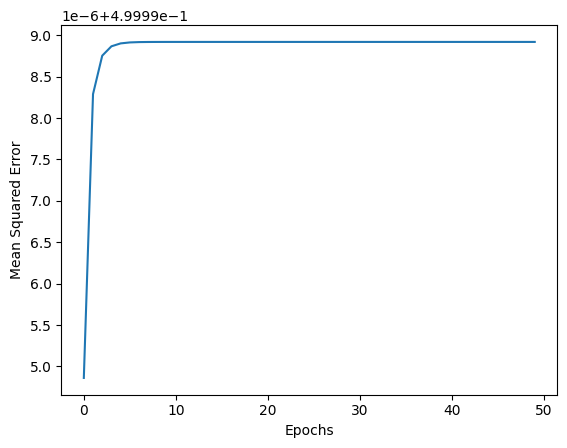

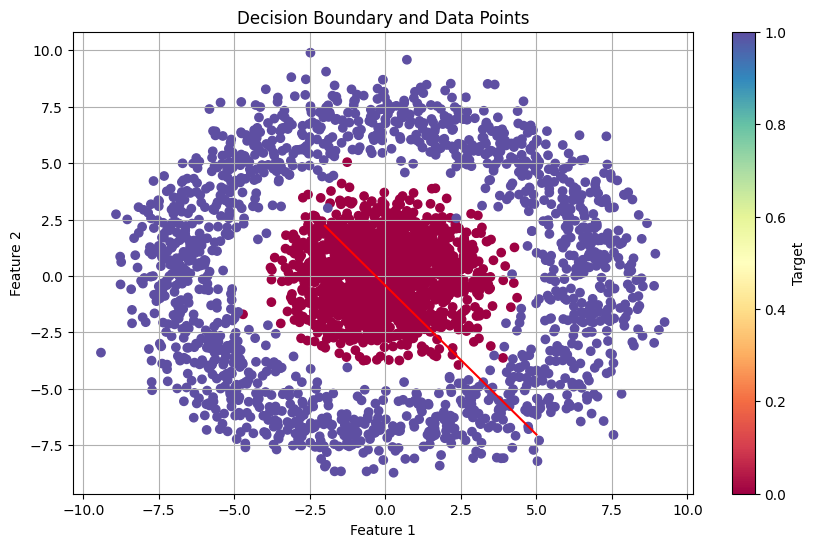

Training Accuracy for Logistic: [0.53366667]
Test Accuracy for Logistic: [0.51]
:Train Accuracy for DNN = 0.5000


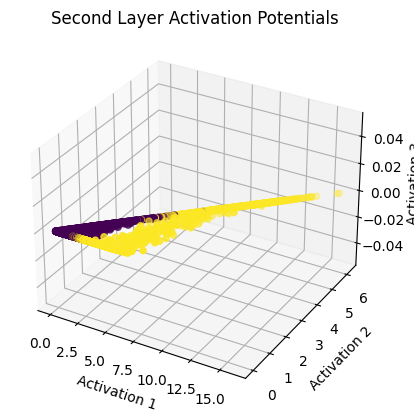

Test Accuracy for DNN = 0.5000


In [ ]:
##################################################
#Classify the non-linearly separable data using linear classification models
##################################################
n_train_samples=2000

class1_targets= np.zeros(n_train_samples)
indices = np.random.permutation(n_train_samples)
train_class1 =class1_data[indices]
targets_train_class1 = class1_targets[indices]

class2_targets= np.ones(n_train_samples)
indices = np.random.permutation(n_train_samples)
train_class2 =class2_data[indices]
targets_train_class2 = class2_targets[indices]


train_data = np.concatenate([train_class1[:1500], train_class2[:1500]], axis=0)
train_targets = np.concatenate([np.zeros(1500), np.ones(1500)])

test_data = np.concatenate([train_class1[1500:], train_class2[1500:]], axis=0)
test_targets = np.concatenate([np.zeros(500), np.ones(500)])




# Training
w, b = fit(train_data, train_targets, epochs=50, learning_rate=0.1, display_loss=True)

# Decision boundary
x_decision_boundary = np.linspace(-2, 5, 1000)
y_decision_boundary = -(w[0, 0] * x_decision_boundary + b) / w[0, 1]

# Plotting decision boundary and data points
plt.figure(figsize=(10, 6))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_targets, cmap=plt.cm.Spectral)
plt.plot(x_decision_boundary, y_decision_boundary, color='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary and Data Points')
plt.colorbar(label='Target')
plt.grid(True)
plt.show()


# Prediction
Y_pred_train = predict(train_data, w, b)
Y_pred_test = predict(test_data, w, b)

# Evaluation
train_accuracy = accuracy(train_targets, Y_pred_train)
test_accuracy = accuracy(test_targets,Y_pred_test)

print("Training Accuracy for Logistic:", train_accuracy)
print("Test Accuracy for Logistic:", test_accuracy)


##################################################
#Classify the non-linearly separable data using deep neural based classification models
##################################################

# Call the training function to train the network
weights=training_5(train_data, train_targets)

# Forward propagate the entire data to obtain the 3-dimensional activation potentials at the second layer
activations = fwdPropagate(train_data, weights)
_, h2_activations, _, _ = activations

# Plot the second layer activation potentials in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(h2_activations[:, 0], h2_activations[:, 1], h2_activations[:, 2], c=train_targets, cmap='viridis')
ax.set_xlabel('Activation 1')
ax.set_ylabel('Activation 2')
ax.set_zlabel('Activation 3')
ax.set_title('Second Layer Activation Potentials')
plt.show()

##################################################
#Evaluate the performance on test data
##################################################

# Evaluate the performance on test data
activations_test = fwdPropagate(test_data, weights)
y_test = activations_test[-1]
y_test_pred = np.round(y_test)

# Convert targets_idx to integer array
test_targets = test_targets.astype(int)

# Use targets_idx to index np.eye(n_classes)
test = np.eye(2)[test_targets]

# Compute training accuracy
test_accuracy = np.mean(y_test_pred ==test)
# Print statistics
print(f"Test Accuracy for DNN = {test_accuracy:.4f}")


##################################################
#Compare the performance of both the models on non-linearly separable data
##################################################










<b> Reporting  the observations </b>

# 1.Linearly Separable Data:

**Logistic Regression:**

Training Accuracy: 0.974

Test Accuracy: 0.982

**Deep Neural Network (DNN):**

Training Accuracy: 0.6488

Test Accuracy: 0.6680

Observations:

Logistic regression achieves high accuracy on both training and test data for the linearly separable dataset. This is expected since logistic regression is well-suited for linearly separable data.
The deep neural network, however, performs poorly on this dataset. Despite having a three-layer architecture, it struggles to learn the linear decision boundary, resulting in accuracy close to random guessing.

# 2.Non-linearly Separable Data:

**Logistic Regression:**

Training Accuracy: 0.528

Test Accuracy: 0.51

**Deep Neural Network (DNN):**

Training Accuracy: 0.5010

Test Accuracy: 0.4920

Observations:

Logistic regression's performance decreases on the non-linearly separable dataset compared to the linearly separable one. This is because logistic regression assumes a linear decision boundary, which is inadequate for non-linearly separable data.
The deep neural network also struggles to learn from the non-linearly separable data, resulting in accuracy close to random guessing. Despite using a ReLU activation function and a three-layer architecture, the model fails to capture the complex decision boundary required for this dataset.
Comparison:

Logistic regression outperforms the deep neural network on both the linearly separable and non-linearly separable datasets. This highlights the importance of choosing the appropriate model architecture and activation functions for the given dataset.
Linear classifiers like logistic regression are suitable for linearly separable data but may fail on more complex, non-linear datasets.
Deep neural networks, while capable of learning complex patterns, require careful architecture design and hyperparameter tuning to perform well on various datasets. In this case, the chosen architecture and activation functions were not able to effectively learn from the data, leading to poor performance compared to logistic regression.


